In [93]:
include("../modules/IVTmodel.jl")


plotMg2PPiphasediagram (generic function with 1 method)

In [58]:
using Pkg
Pkg.activate("../IVTmodel")
Pkg.instantiate()
include("../modules/IVTmodel.jl")
#Generates settings for parameters used
fittingmodel = setupmodel_IVT4()
#Imports calibration data from csv files
modeldata = importakamadata()
osumidata = importosumidata()
#Imports PPiase validation data
PPiasedata = importakamaPPiasedata();
akamafittedparametersmatrix = Matrix(CSV.read("../outputs/fittedparameters.csv", DataFrame,header=false))
fittedparamslist = reshape(akamafittedparametersmatrix,(size(akamafittedparametersmatrix)[1],))
covariancemat = Matrix(CSV.read("../outputs/covariancematrix.csv", DataFrame,header=false))
fittedparams = fullparameterset(fittingmodel,fittedparamslist)
printresidual(fittingmodel,modeldata,osumidata,fittedparamslist)

  Activating project at `C:\Users\ChemeGrad2021\Documents\Braatz Group\MRNA Synthesis\Published code\IVT2.0\IVTmodel`
Precompiling project...
  ? Metrics


Model has 24 fitted parameters, 16 of which have a bayesian prior
Total Residual:                        1115.7
Components of residual:
Concentration Trajectories (Figure 2): 455.1
Initial Reaction Rate (Figure 3A):     200.1
Mg2PPi solubility (Figure 3B):         221.0
Parameter priors:                      152.9
pH Effect Data:                        86.5


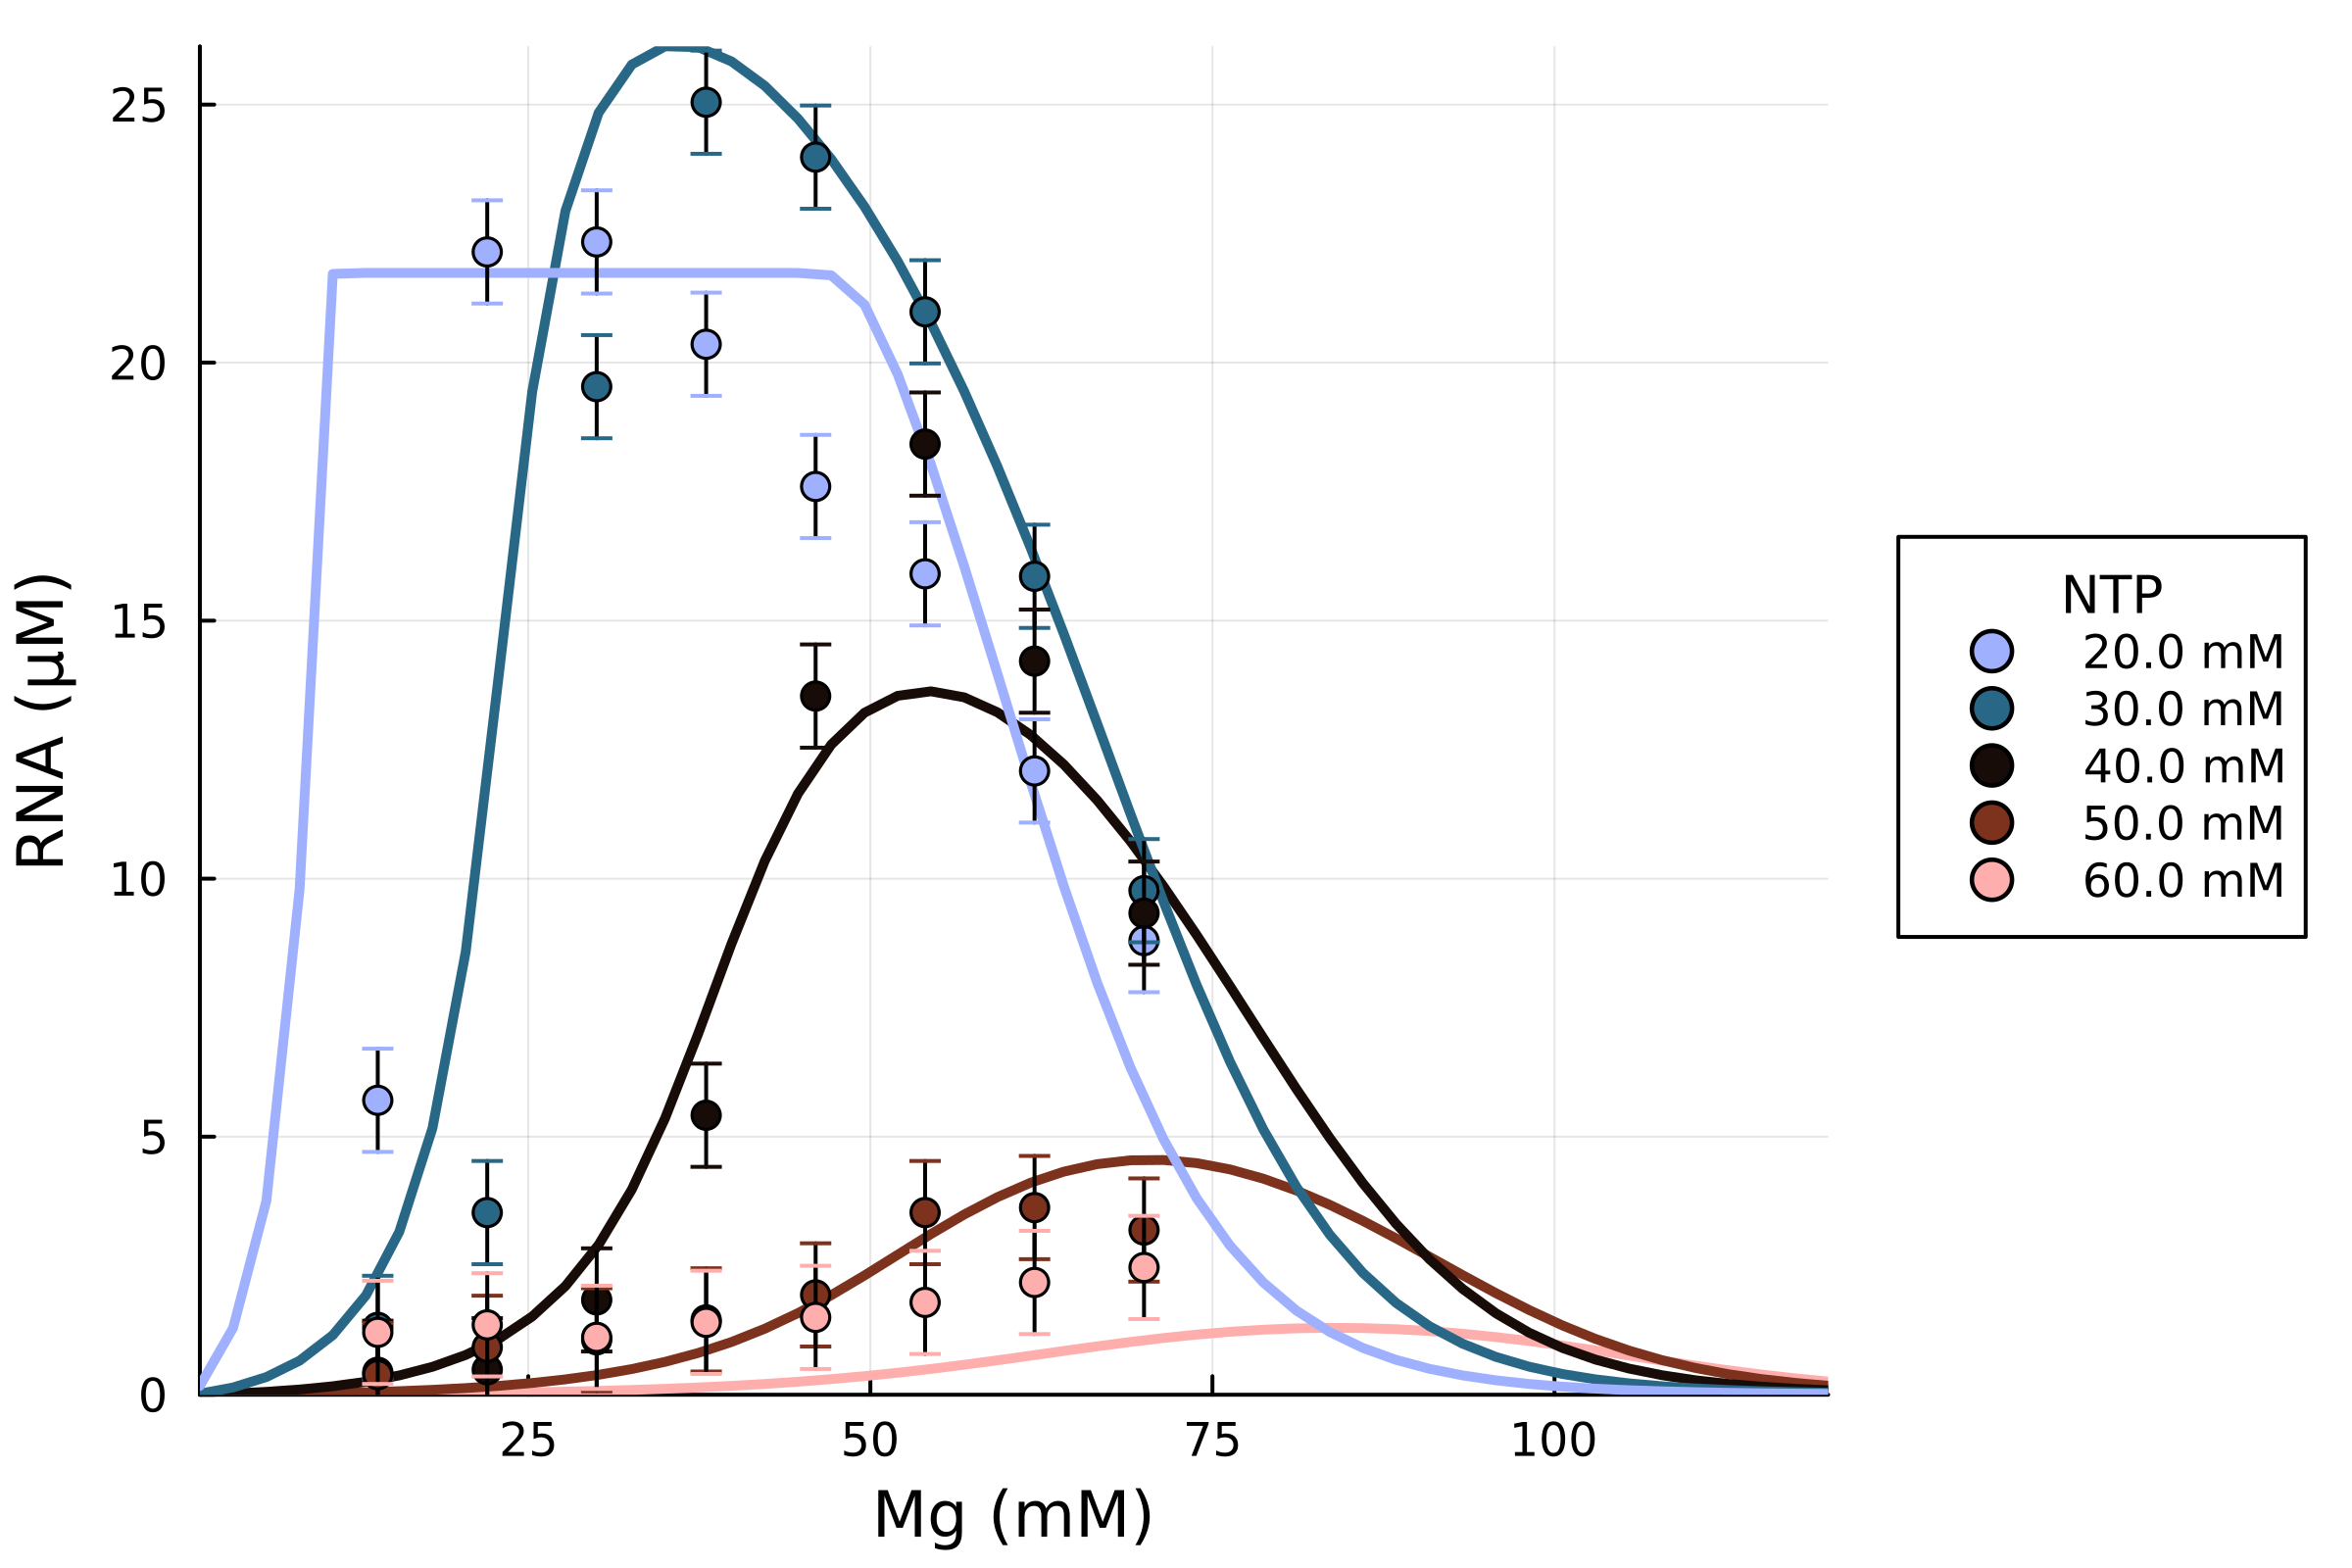

In [59]:
df = CSV.read("../data/external/guo/guoMgNTP.csv", DataFrame)
guodata = Matrix(df)
plt = plotbyMg(fittingmodel,guodata,fittedparamslist , covariancemat;showconfidence = false, seperateDNA = true, OAccounterion = false, showpredictions = true)
plot!(dpi = 400)
savefig(plt,"../figures/GM6_27/guomain.png")
plt

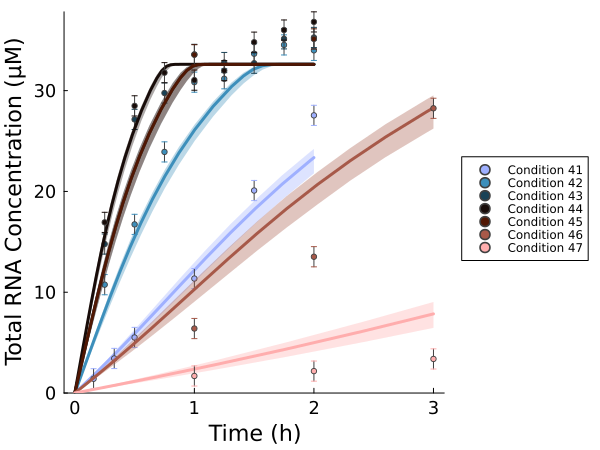

In [60]:
#Note: Following effective T7 concentration from above
preground3filename = "../data/external/guo/guofig1.csv"
plt = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,preground3filename,range = [41,42,43,44,45,46,47],plotsize = (600,450),dataerrorbars = true, multiplot = false,maximumyield = false, precip = true, seperateDNA = true, OAccounterion = false)

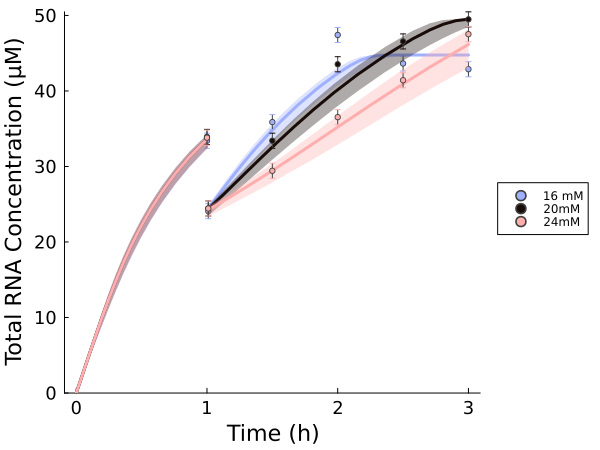

In [90]:
guofirstadditionfilename = "../data/external/guo/guofirstadditionkinetics.csv"
plt = plot()
discretefeedingschedule4mM = [[1.0, (25/18)*10e-3, (25/18)*4e-3, (25/18)*4e-3, (25/18)*4e-3, (25/18)*4e-3, 5*4e-3, (25/18)-1]  [Inf, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]'
discretefeedingschedule5mM = [[1.0, (25/18)*10e-3, (25/18)*5e-3, (25/18)*5e-3, (25/18)*5e-3, (25/18)*5e-3, 5*5e-3, (25/18)-1]  [Inf, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]'
discretefeedingschedule6mM = [[1.0, (25/18)*10e-3, (25/18)*6e-3, (25/18)*6e-3, (25/18)*6e-3, (25/18)*6e-3, 5*6e-3, (25/18)-1]  [Inf, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]'


discretefeedingschedules = [discretefeedingschedule4mM,discretefeedingschedule5mM,discretefeedingschedule6mM]
plt1 = plot()
plotfedbatchfromcsv!(plt1,fittingmodel,fittedparamslist,covariancemat,guofirstadditionfilename,discretefeedingschedules; labels = ["16 mM", "20mM", "24mM"], plotsize = (600,450), range = [1,2,3],dataerrorbars = true, seperateDNA = true, OAccounterion = false)

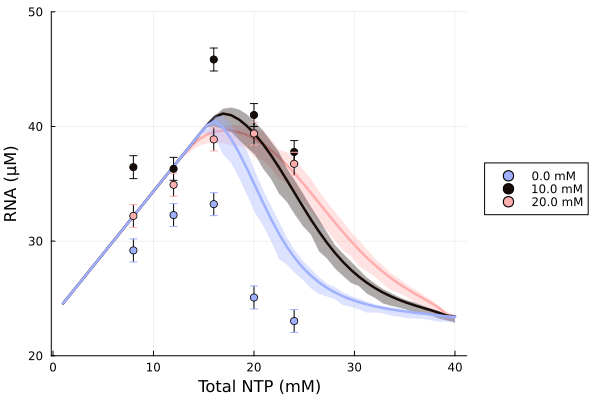

In [95]:
df = CSV.read("../data/external/guo/guofirstadditionMgNTP.csv", DataFrame)
guofirstadditiondata = Matrix(df)
plt = plot()
plotadditionscreen!(plt,fittingmodel,guofirstadditiondata,fittedparamslist,covariancemat,showconfidence = true,showdata = true, NTPpoints = 50, nmc = 200, OAccounterion = false, seperateDNA = true)
plot!(ylims = (20,50))

In [63]:
include("../modules/IVTmodel.jl")

plotMg2PPiphasediagram (generic function with 1 method)

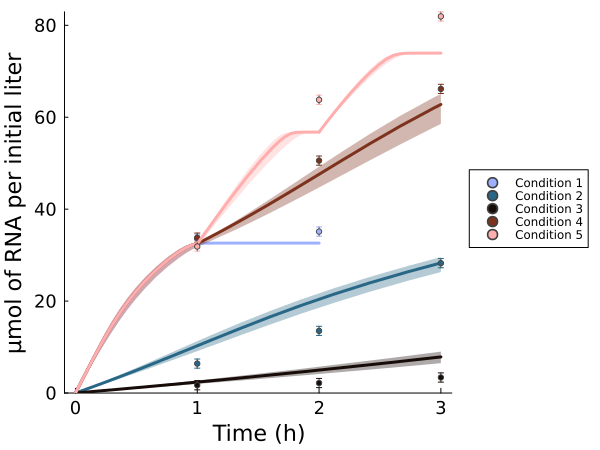

In [96]:
#Note: Following effective T7 concentration from above
guofinalscreenfilename = "../data/external/guo/guofinalscreen.csv"
plt = plot()
discretefeedingschedule1 = reshape([Inf, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],(1,8))
discretefeedingschedule2 = reshape([Inf, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],(1,8))
discretefeedingschedule3 = reshape([Inf, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],(1,8))
discretefeedingschedule4 = [[1.0, (25/18)*10e-3, (25/18)*6e-3, (25/18)*6e-3, (25/18)*6e-3, (25/18)*6e-3, 5*6e-3, (25/18)-1]  [Inf, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]'
discretefeedingschedule5 = [[1.0, (25/18)*10e-3, (25/18)*4e-3, (25/18)*4e-3, (25/18)*4e-3, (25/18)*4e-3, 5*6e-3, (25/18)-1] [2.0, (25/18)*(1+7/16.56)*10e-3, (25/18)*(1+7/16.56)*2e-3, (25/18)*(1+7/16.56)*2e-3, (25/18)*(1+7/16.56)*2e-3, (25/18)*(1+7/16.56)*2e-3, 5*2e-3, (7/16.56)]  [Inf, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]'


discretefeedingschedules = [discretefeedingschedule1,discretefeedingschedule2,discretefeedingschedule3,discretefeedingschedule4,discretefeedingschedule5]
plt1 = plot()
plotfedbatchfromcsv!(plt1,fittingmodel,fittedparamslist,covariancemat,guofinalscreenfilename,discretefeedingschedules; plotsize = (600,450), range = [1,2,3,4,5],dataerrorbars = true, seperateDNA = true, OAccounterion = false)